### Исследование зависимости рубля от цены на нефть

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FIGSIZE = (10, 5)
YEAR = 365
STEP = 10

In [3]:
usd_rur = pd.read_csv('currency_exchange_rates_02-01-1995_-_02-05-2018.csv', index_col='Date')
usd_rur = usd_rur[['Russian Ruble']]
usd_rur.rename(columns={'Russian Ruble':'USD_RUR'}, inplace=True)
usd_rur.index = pd.to_datetime(usd_rur.index)
usd_rur = usd_rur.interpolate(method='nearest')
usd_rur.head()

,USD_RUR
Date,
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
1995-01-06,NaN


In [4]:
brent = pd.read_csv('brent-daily.csv', index_col='Date')
brent.rename(columns={'Price':'Brent'}, inplace=True)
brent.index = pd.to_datetime(brent.index)
brent.head()

,Brent
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [5]:
df = pd.concat([usd_rur, brent], axis=1, sort=False)
df = df.dropna()
df.head()

,USD_RUR,Brent
Date,,
2003-05-05,31.1105,23.59
2003-05-06,31.1184,23.91
2003-05-07,31.1009,24.01
2003-05-08,31.1001,24.48
2003-05-09,31.1001,25.55


In [6]:
df.index[0], df.index[-1]

(Timestamp('2003-05-05 00:00:00'), Timestamp('2018-04-30 00:00:00'))

Отобразим графики цены на нефть марки Brent и стоимости доллара в рублях.

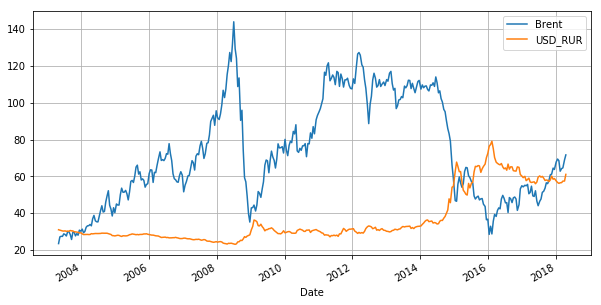

In [7]:
df[['Brent', 'USD_RUR']][::STEP].plot(figsize=FIGSIZE);
plt.grid(True)

Заметно наличие обратной зависимости этих двух величин.

Для удобства обратим USD/RUR в RUR/USD и построим для него два графика из начала Brent и из середины, умножив их значения на соответсвующие коэффициенты.

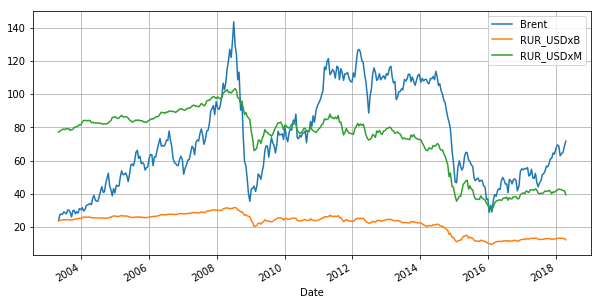

In [8]:
df['RUR_USD'] = 1 / df['USD_RUR']

b = df['Brent'][0] / df['RUR_USD'][0]
m = df['Brent'].mean() / df['RUR_USD'].mean()

df['RUR_USDxB'] = df['RUR_USD'] * b
df['RUR_USDxM'] = df['RUR_USD'] * m

df[['Brent', 'RUR_USDxB', 'RUR_USDxM']][::STEP].plot(figsize=FIGSIZE);
plt.grid(True)

Посмотрим, как выглядит регрессия для цены на нефть марки Brent и рубля.

In [17]:
def f(begin=0, end=-1, step=1, color='black'):
    x = df[begin:end:step]['Brent']
    y = df[begin:end:step]['RUR_USD']

    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)

    c = np.linspace(0,1,len(df['Brent']))
    c = c[begin:end:1]
    plt.scatter(x, y, 30, c, edgecolor='black');

    ox = x
    oy = b0 + b1 * ox
    plt.plot(ox, oy, color=color);

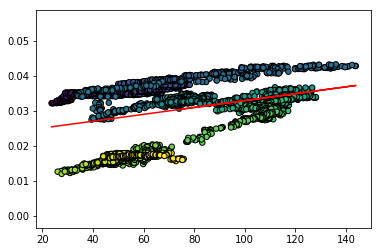

In [11]:
f(0, -1, 1, 'red')

Заметно, что зависимость непостоянная и зависит от временного интервала. Добавим ещё одну координату для даты.

In [12]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

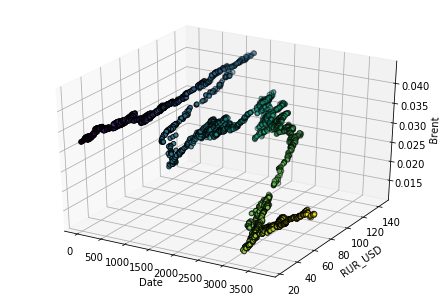

In [13]:
fig = figure()
ax = Axes3D(fig)

ax.set_xlabel('Date')
ax.set_zlabel('Brent')
ax.set_ylabel('RUR_USD')

# STEP=10

c = linspace(0,10,len(df[::1]));
date = [i for i in range(len(df))]
date = date[::1]
ax.scatter(date, df[::1]['Brent'], df[::1]['RUR_USD'], c=c, edgecolor='black')
plt.show()

Похоже на ломаную из шести отрезков. Попробуем найти примерные координаты, в которых они соединяются.

[0, 1320, 1440, 1480, 2020, 2800, 3210, -1]

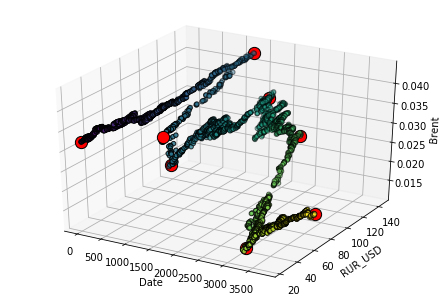

In [14]:
fig = figure()
ax = Axes3D(fig)

ax.set_xlabel('Date')
ax.set_zlabel('Brent')
ax.set_ylabel('RUR_USD')

c = linspace(0,10,len(df[::1]));
date = [i for i in range(len(df))]
date = date[::1]
ax.scatter(date, df[::1]['Brent'], df[::1]['RUR_USD'], c=c, edgecolor='black')

dates = [0, 1320, 1440, 1480, 2020, 2800, 3210, -1]
display(dates)

for d in dates:
    ax.scatter(date[d], df[::1]['Brent'][d], df[::1]['RUR_USD'][d], c='red', edgecolor='black', s=150, zorder=2)
plt.show()

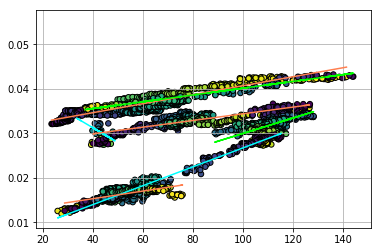

In [18]:
plt.grid(True)
f(dates[0], dates[1], 1, 'coral')
f(dates[1], dates[2], 1, 'lime')
f(dates[2], dates[3], 1, 'aqua')
f(dates[3], dates[4], 1, 'coral')
f(dates[4], dates[5], 1, 'lime')
f(dates[5], dates[6], 1, 'aqua')
f(dates[6], dates[7], 1, 'coral')

1) 2003-05-05  Brent: ^6.10 RUR: ^1.33  Corr: +91%
2) 2008-07-03  Brent: v4.08 RUR: v1.21  Corr: +98%
3) 2008-12-23  Brent: ^1.17 RUR: v1.27  Corr: -49%
4) 2009-02-23  Brent: ^2.95 RUR: ^1.28  Corr: +80%
5) 2011-04-18  Brent: v1.07 RUR: v1.24  Corr: +50%
6) 2014-06-17  Brent: v3.96 RUR: v2.27  Corr: +98%
7) 2016-02-11  Brent: ^2.63 RUR: ^1.28  Corr: +70%

T) 2003-05-05  Brent: ^3.22 RUR: v1.99  Corr: +34%


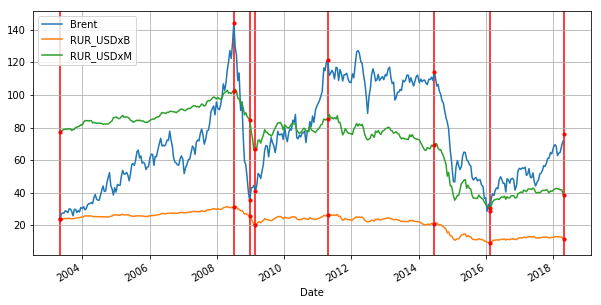

In [19]:
for i in range(0, len(dates)):
    i_str = str(i + 1)
    j = i+1
    if i == len(dates) - 1:
        i = 0
        j = -1
        i_str = 'T'
        print()
        
    corrcoef = np.corrcoef(df['Brent'][dates[i]:dates[j]], df['RUR_USD'][dates[i]:dates[j]])[1][0]
    date = df.index[dates[i]]
    date = str(date)[:str(date).find(' ')]
    
    brent_changed = df['Brent'][dates[j]] / df['Brent'][dates[i]]
    bc_direction = '^'
    if brent_changed < 1:
        brent_changed = 1 / brent_changed
        bc_direction = 'v'
        
    rur_changed = df['RUR_USD'][dates[j]] / df['RUR_USD'][dates[i]]
    rur_direction = '^'
    if rur_changed < 1:
        rur_changed = 1 / rur_changed
        rur_direction = 'v'
        
    print(f'{i_str}) {date}  Brent: {bc_direction}{brent_changed:.2f} RUR: {rur_direction}{rur_changed:.2f}  Corr: {100*corrcoef:+.0f}%')

df[['Brent', 'RUR_USDxB', 'RUR_USDxM']][::STEP].plot(figsize=FIGSIZE);
plt.grid(True)
for dt in dates:
    plt.scatter(df.index[dt], df['Brent'][dt], color='red', s=10, zorder=10);
    plt.scatter(df.index[dt], df['RUR_USDxB'][dt], color='red', s=10, zorder=10);
    plt.scatter(df.index[dt], df['RUR_USDxM'][dt], color='red', s=10, zorder=10);
    plt.axvline(x=df.index[dt], color='red', zorder=-1);

# df[['BrentMa', 'RUR_USDxB_MA', 'RUR_USDxM_MA']][::STEP].plot(figsize=FIGSIZE);
# plt.grid(True)
# for dt in dates:
#     plt.scatter(df.index[dt], df['BrentMa'][dt], color='red', s=10, zorder=10);
#     plt.scatter(df.index[dt], df['RUR_USDxB_MA'][dt], color='red', s=10, zorder=10);
#     plt.scatter(df.index[dt], df['RUR_USDxM_MA'][dt], color='red', s=10, zorder=10);
#     plt.axvline(x=df.index[dt], color='red', zorder=-1);

Для семи временных диапазонов, на которые мы разделили графики, мы видим следующее:

1) (2003-2009) Уверенный продолжительный многократный рост Brent. Корреляция с рублём 91%.  
2) (2008-2008) Очень резкое падение Brent. Рубль реагирует. Корреляция 98%.  
3) (2008-2009) Несмотря на короткий, но резкий скачок Brent, рубль усиливает падение. Корреляция -49%.  
4) (2009-2011) Brent уверенно растёт. Рубль на это реагирует слабо. Корреляция 80%.  
5) (2011-2014) Brent не подвергается сильным изменениям, рубль снова падает. Корреляция 50%.  
6) (2014-2016) Резкое падение Brent. Рубль также очень уверенно падает. Корреляция 98%.  
7) (2016-2018) Brent уверенно растёт. Рубль тоже растёт, но слабо. Корреляция 70%.

##### Выводы

In [20]:
print((df.index[0], df['Brent'][0], df['USD_RUR'][0]))
print((df.index[-1], df['Brent'][-1], df['USD_RUR'][-1]))

print()

print(df['Brent'][-1] / df['Brent'][0])
print(df['USD_RUR'][-1] / df['USD_RUR'][0])

(Timestamp('2003-05-05 00:00:00'), 23.590000000000007, 31.1105)
(Timestamp('2018-04-30 00:00:00'), 75.91999999999999, 61.9997)

3.2183128444256024
1.992886645987689


Несмотря на то, что наблюдается сильная зависимость рубля от стоимости нефти, с 2003 по 2018 год нефть подорожала в 3.2 раза, а рубль при этом относительно доллара подешевел в 2 раза.  
Судя по данному исследованию, рубль коррелирует с ценной на нефть намного сильнее, когда цена на нефть падает, чем когда растёт, на всём интервале исследования.  
А поскольку цена на нефть сейчас достаточно большая, можно сделать прогноз, что рубль будет дальше дешеветь.